<a href="https://colab.research.google.com/github/nhiduong611/MAT421/blob/main/Module_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ODE Initial Value Problem Statement



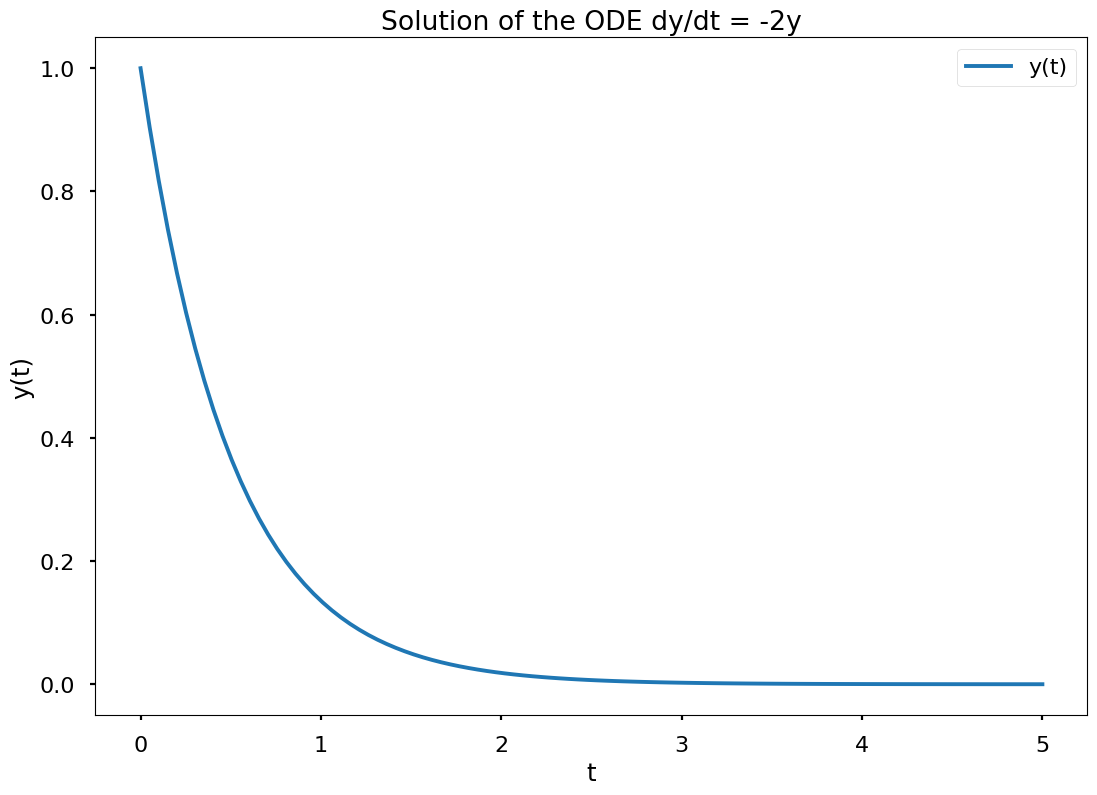

In [3]:
# ODE dy/dt = -2y, y0 = 1, solution y(t) = e^-2t.
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the ODE
def ode_system(t, y):
    return -2 * y

# Initial condition
y0 = [1]

# Time span for the solution
t_span = (0, 5)  # From t=0 to t=5

# Time points at which to solve the ODE
t_eval = np.linspace(*t_span, 100)

# Solve the ODE
sol = solve_ivp(ode_system, t_span, y0, t_eval=t_eval)

# Plotting the solution
plt.plot(sol.t, sol.y[0], label='y(t)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.title('Solution of the ODE dy/dt = -2y')
plt.show()


Reduction of Order



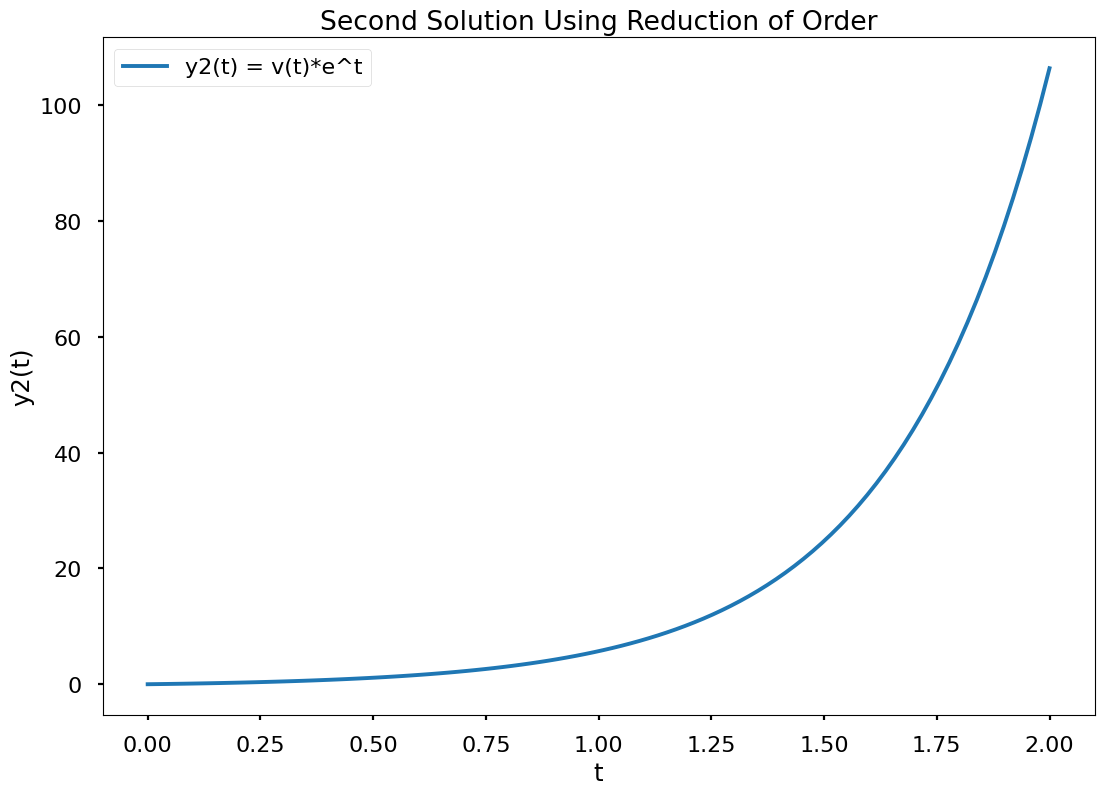

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Given differential equation: y'' - y = 0
# Known solution: y1(t) = e^t

# Define the reduced equation for v'(t) derived from y'' - y = 0
def reduced_eq(t, v):
    y1 = np.exp(t)
    y1_prime = np.exp(t)
    return [v[1], y1**2]  # Returns v' and v''

# Initial conditions for v and v'. For reduction of order, we start with arbitrary initial conditions.
v0 = [0, 1]  # We choose v(0) = 0 (arbitrary) and v'(0) = 1 to ensure linear independence

# Time span
t_span = (0, 2)
t_eval = np.linspace(*t_span, 100)

# Solve the reduced equation
sol = solve_ivp(reduced_eq, t_span, v0, t_eval=t_eval)

# Extract v(t) solution and compute the second solution y2(t) = v(t)*e^t
v = sol.y[0]
y2 = v * np.exp(sol.t)

# Plot the second solution y2(t)
plt.plot(sol.t, y2, label='y2(t) = v(t)*e^t')
plt.xlabel('t')
plt.ylabel('y2(t)')
plt.legend()
plt.title('Second Solution Using Reduction of Order')
plt.show()


The Euler Method



<ipython-input-2-ccf6beb8088b>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


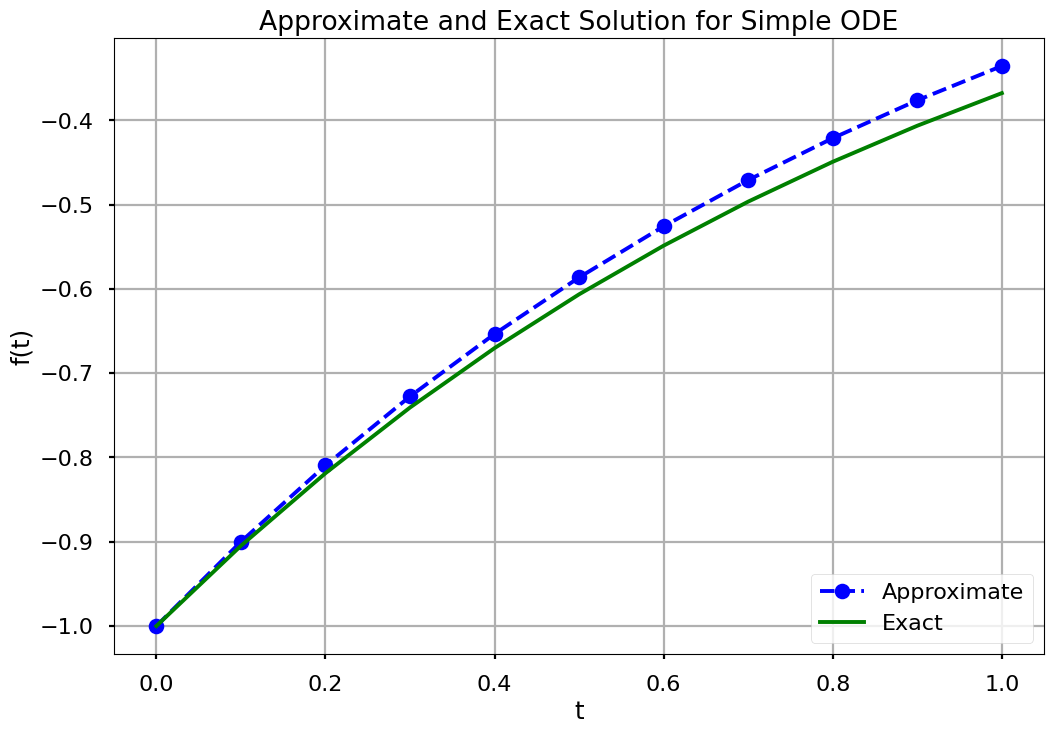

In [2]:
# Approximate the solution to this initial value problem between 0 and 1 in increments of 0.1 using the Explicity Euler Formula
# df(t)/dt = e^-t, f0 = -1, solution f(t) = -e^-t.

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

# Define parameters
f = lambda t, s: np.exp(-t) # ODE
h = 0.1 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()